## Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import sklearn
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_tweedie_deviance
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Hide Warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

%config InlineBackend.figure_format='svg' # To create high resolution images

## Reading the csv file

In [148]:
df_train = pd.read_csv(r"C:\Users\User\Desktop\ML Projects\Drilling fluid loss\Train_Data_DL_1.csv")
df_train.head()

Depth (m)  Meterage (m)  Drilling time (hr)  Formation type  Hole size  \
0     3957.0          17.0                24.0              15     12.250   
1     2881.0          14.0                13.0               9     12.250   
2     3494.0          90.0                24.0               2      4.125   
3     3740.0          55.0                16.0               2      5.875   
4     2837.5           6.5                 3.0              10     17.500   

   WOB (1000lb)  Flow rate (gpm)  MW (pcf)  MFVIS  Retort solid (%)  \
0          27.5              430      80.0     44              20.0   
1          22.5              550     140.0     51              44.0   
2           6.5              190      57.5     36              13.0   
3          22.0              250      55.5     34               3.0   
4          22.5              800     100.0     46              26.0   

   Pore pressure (psi)  Fracture pressure (psi)  Fan 600/Fan 300  \
0          6896.406814              9450.631560         1.602919   
1          7713.479368              9516.431614         1.802491   
2          4268.104581              8653.143534         1.696500   
3          4615.819356              9358.099516         1.640843   
4          4015.829623              6873.814424         1.645142   

   Gel10min/Gel10s  Pump pressure (psi)         RPM  Mud loss (bbl/hr)  
0         1.242697          1418.333828  138.555836          97.243540  
1         1.569439          2480.546481  145.590288           0.403920  
2         1.641224          2066.162756   71.098159          11.310959  
3         1.684190          1111.250371  117.779180          48.479061  
4         1.599919          2762.944758  168.918919           2.380754

In [149]:
df_test = pd.read_csv(r"C:\Users\User\Desktop\ML Projects\Drilling fluid loss\Test_Data_DL_1.csv")
df_test.head()

Depth (m)  Meterage (m)  Drilling time (hr)  Formation type  Hole size  \
0     2016.0          45.0                24.0               8     17.500   
1     3715.0          61.0                24.0               2      4.125   
2     1296.0          74.0                17.0               1     17.500   
3     2671.0          86.0                22.0               7     12.250   
4     1494.0         102.0                22.0               1     17.500   

   WOB (1000lb)  Flow rate (gpm)  MW (pcf)  MFVIS  Retort solid (%)  \
0          22.5              800     115.0     41              30.0   
1           7.5              145      62.5     44              14.0   
2          45.0              900      66.0     33               4.0   
3          15.0              600     151.0     59              49.0   
4          37.5              900      68.5     30               8.0   

   Pore pressure (psi)  Fracture pressure (psi)  Fan 600/Fan 300  \
0          8125.593487              9931.280929         1.734426   
1          4307.665339              8733.348905         1.684718   
2          2231.900200              3505.062670         1.347572   
3          8022.486536              9805.261322         1.737184   
4          2868.376939              4504.610435         1.254598   

   Gel10min/Gel10s  Pump pressure (psi)         RPM  Mud loss (bbl/hr)  
0         1.446490          2654.633205  181.615682           0.000000  
1         1.451539          2274.509950   80.891743         158.537868  
2         1.358334          1870.231660  162.866053           0.000000  
3         1.444812          2669.414909  177.435402          24.676270  
4         1.269205          2641.519157  157.580933           7.394713

### Dropping useless columns

In [150]:
# Define input and output for train data
X_train = df_train.drop(['Mud loss (bbl/hr)'], 1)
y_train = df_train[['Mud loss (bbl/hr)']]

In [151]:
# Define input and output for test data
X_test = df_test.drop(['Mud loss (bbl/hr)'], 1)
y_test = df_test[['Mud loss (bbl/hr)']]

In [137]:
len(X_train)

2365

In [138]:
len(X_test)

418

## Using different Regression Models to make predictions

### Ridge regression

In [2]:
from sklearn.linear_model import Ridge
from sklearn import metrics

In [140]:
# Ridge Regression
ridge = Ridge() 
ridge.fit(X_train, y_train)

# evaluate the model
yridge = ridge.predict(X_test)

In [141]:
# Evaluate model predictions

ridge_score_train = ridge.score(X_train, y_train)
ridge_score_test = ridge.score(X_test, y_test)
ridge_mae = metrics.mean_absolute_error(y_test, yridge)
ridge_mse = metrics.mean_squared_error(y_test, yridge)
ridge_rmse = np.sqrt(metrics.mean_squared_error(y_test, yridge))
print('Accuracy of train data:',ridge_score_train)
print('Accuracy of test data:' ,ridge_score_test)
print('Mean Absolute Error:', ridge_mae)  
print('Mean Squared Error:', ridge_mse)  
print('Root Mean Squared Error:', ridge_rmse)

Accuracy of train data: 0.3723937650731838
Accuracy of test data: 0.3817375138080804
Mean Absolute Error: 60.021662518260456
Mean Squared Error: 8877.001269722376
Root Mean Squared Error: 94.21783944520473


In [142]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

ridger = OLS(y_test, add_constant(yridge)).fit()
print('AIC:', ridger.aic)

AIC: 4971.193295613582


### Lasso regression

In [13]:
from sklearn.linear_model import Lasso

In [14]:
# Lasso Regression
lasso = Lasso() 
lasso.fit(X_train, y_train) 

# evaluate the model
ylasso = lasso.predict(X_test)

In [15]:
# Evaluate model predictions

lasso_score_train = lasso.score(X_train, y_train)
lasso_score_test = lasso.score(X_test, y_test)
lasso_mae = metrics.mean_absolute_error(y_test, ylasso)
lasso_mse = metrics.mean_squared_error(y_test, ylasso)
lasso_rmse = np.sqrt(metrics.mean_squared_error(y_test, ylasso))
print('Accuracy of train data:',lasso_score_train)
print('Accuracy of test data:' ,lasso_score_test)
print('Mean Absolute Error:', lasso_mae)  
print('Mean Squared Error:', lasso_mse)  
print('Root Mean Squared Error:', lasso_rmse)

Accuracy of train data: 0.3678219143440856
Accuracy of test data: 0.3742099733535883
Mean Absolute Error: 59.505860091296576
Mean Squared Error: 8985.081555466368
Root Mean Squared Error: 94.7896700883929


In [16]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

lassor = OLS(y_test, add_constant(ylasso)).fit()
print('AIC:', lassor.aic)

AIC: 4973.898064868454


### Support Vector Machine

In [73]:
from sklearn import svm

SVM = svm.SVR(C=500, cache_size=2, epsilon=0.5, gamma=10, kernel='rbf')
SVM.fit(X_train, y_train)

# evaluate the model
ysvm = SVM.predict(X_test)

In [74]:
# Evaluate model predictions

SVM_score_train = SVM.score(X_train, y_train)
SVM_score_test = SVM.score(X_test, y_test)
SVM_mae = metrics.mean_absolute_error(y_test, ysvm)
SVM_mse = metrics.mean_squared_error(y_test, ysvm)
SVM_rmse = np.sqrt(metrics.mean_squared_error(y_test, ysvm))
print('Accuracy of train data:',SVM_score_train)
print('Accuracy of test data:' ,SVM_score_test)
print('Mean Absolute Error:', SVM_mae)  
print('Mean Squared Error:', SVM_mse)  
print('Root Mean Squared Error:', SVM_rmse)

Accuracy of train data: 0.9948920970865952
Accuracy of test data: -0.027343804134321692
Mean Absolute Error: 73.38987747904423
Mean Squared Error: 14750.583218970953
Root Mean Squared Error: 121.45197906568238


In [75]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

SVMR = OLS(y_test, add_constant(ysvm)).fit()
print('AIC:', SVMR.aic)

AIC: 5189.354220800176


### 6.4. Decision tree regression

In [76]:
from sklearn.tree import DecisionTreeRegressor

In [77]:
# Decision Tree Regression
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

# evaluate the model
ytree = tree.predict(X_test)

In [78]:
# Evaluate model predictions

tree_score_train = tree.score(X_train, y_train)
tree_score_test = tree.score(X_test, y_test)
tree_mae = metrics.mean_absolute_error(y_test, ytree)
tree_mse = metrics.mean_squared_error(y_test, ytree)
tree_rmse = np.sqrt(metrics.mean_squared_error(y_test, ytree))
print('Accuracy of train data:',tree_score_train)
print('Accuracy of test data:' ,tree_score_test)
print('Mean Absolute Error:', tree_mae)  
print('Mean Squared Error:', tree_mse)  
print('Root Mean Squared Error:', tree_rmse)

Accuracy of train data: 1.0
Accuracy of test data: 0.9161759717551652
Mean Absolute Error: 18.345172202435407
Mean Squared Error: 1203.5438374173973
Root Mean Squared Error: 34.6921293295381


In [79]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

treer = OLS(y_test, add_constant(ytree)).fit()
print('AIC:', treer.aic)

AIC: 4153.393012098266


### 6.5. Random forest regression

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
# Random Forest Regression
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

# evaluate the model
yforest = forest.predict(X_test)

In [82]:
# Evaluate model predictions

forest_score_train = forest.score(X_train, y_train)
forest_score_test = forest.score(X_test, y_test)
forest_mae = metrics.mean_absolute_error(y_test, yforest)
forest_mse = metrics.mean_squared_error(y_test, yforest)
forest_rmse = np.sqrt(metrics.mean_squared_error(y_test, yforest))
print('Accuracy of train data:',forest_score_train)
print('Accuracy of test data:' ,forest_score_test)
print('Mean Absolute Error:', forest_mae)  
print('Mean Squared Error:', forest_mse)  
print('Root Mean Squared Error:', forest_rmse)

Accuracy of train data: 0.9843281402261885
Accuracy of test data: 0.9239395916829681
Mean Absolute Error: 18.14379905442868
Mean Squared Error: 1092.0739269894893
Root Mean Squared Error: 33.04654183102204


In [83]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

forestr = OLS(y_test, add_constant(yforest)).fit()
print('AIC:', forestr.aic)

AIC: 4025.9306967929115


### 6.6. Extra tree regression

In [84]:
from sklearn.ensemble import ExtraTreesRegressor

In [85]:
# Extra Tree Regression
extra = ExtraTreesRegressor()
extra.fit(X_train, y_train)

# evaluate the model
yextra = extra.predict(X_test)

In [86]:
# Evaluate model predictions

extra_score_train = extra.score(X_train, y_train)
extra_score_test = extra.score(X_test, y_test)
extra_mae = metrics.mean_absolute_error(y_test, yextra)
extra_mse = metrics.mean_squared_error(y_test, yextra)
extra_rmse = np.sqrt(metrics.mean_squared_error(y_test, yextra))
print('Accuracy of train data:',extra_score_train)
print('Accuracy of test data:' ,extra_score_test)
print('Mean Absolute Error:', extra_mae)  
print('Mean Squared Error:', extra_mse)  
print('Root Mean Squared Error:', extra_rmse)

Accuracy of train data: 1.0
Accuracy of test data: 0.9598190260392793
Mean Absolute Error: 12.566947313164663
Mean Squared Error: 576.9176762849527
Root Mean Squared Error: 24.01911064725238


In [87]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

extrar = OLS(y_test, add_constant(yextra)).fit()
print('AIC:', extrar.aic)

AIC: 3764.492028240466


### 6.6. Gradient boosting regression

In [88]:
from sklearn.ensemble import GradientBoostingRegressor

In [89]:
# Gradient Boosting Regression
gbr = GradientBoostingRegressor()

gbr.fit(X_train, y_train)

# evaluate the model
ygbr = gbr.predict(X_test)

In [90]:
# Evaluate model predictions

gbr_score_train = gbr.score(X_train, y_train)
gbr_score_test = gbr.score(X_test, y_test)
gbr_mae = metrics.mean_absolute_error(y_test, ygbr)
gbr_mse = metrics.mean_squared_error(y_test, ygbr)
gbr_rmse = np.sqrt(metrics.mean_squared_error(y_test, ygbr))
print('Accuracy of train data:',gbr_score_train)
print('Accuracy of test data:' ,gbr_score_test)
print('Mean Absolute Error:', gbr_mae)  
print('Mean Squared Error:', gbr_mse)  
print('Root Mean Squared Error:', gbr_rmse)

Accuracy of train data: 0.8685134749877775
Accuracy of test data: 0.8016306391311436
Mean Absolute Error: 33.68194816118184
Mean Squared Error: 2848.183591330224
Root Mean Squared Error: 53.36837632278336


In [91]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

gbrr = OLS(y_test, add_constant(ygbr)).fit()
print('AIC:', gbrr.aic)

AIC: 4469.809571797325


### 6.7. XGB regression

In [92]:
from xgboost.sklearn import XGBRegressor

In [93]:
# XGBoost Regressor
xgb = XGBRegressor()

xgb.fit(X_train, y_train)

# evaluate the model
yxgb = xgb.predict(X_test)

In [94]:
# Evaluate model predictions

xgb_score_train = xgb.score(X_train, y_train)
xgb_score_test = xgb.score(X_test, y_test)
xgb_mae = metrics.mean_absolute_error(y_test, yxgb)
xgb_mse = metrics.mean_squared_error(y_test, yxgb)
xgb_rmse = np.sqrt(metrics.mean_squared_error(y_test, yxgb))
print('Accuracy of train data:',xgb_score_train)
print('Accuracy of test data:' ,xgb_score_test)
print('Mean Absolute Error:', xgb_mae)  
print('Mean Squared Error:', xgb_mse)  
print('Root Mean Squared Error:', xgb_rmse)

Accuracy of train data: 0.9987299533764753
Accuracy of test data: 0.9214764637812116
Mean Absolute Error: 17.720564546067475
Mean Squared Error: 1127.4394715594913
Root Mean Squared Error: 33.577365464840916


In [95]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

xgbr = OLS(y_test, add_constant(yxgb)).fit()
print('AIC:', xgbr.aic)

AIC: 4088.8252107939848


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

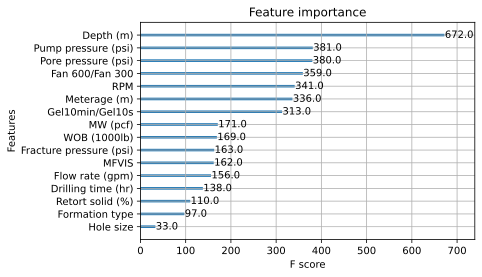

In [96]:
from xgboost import plot_importance
plot_importance(xgb)

In [97]:
summary=pd.DataFrame()
summary['Models'] = ['Ridge Regression', 'Lasso Regression', 'Support Vector Machine', 'Decision Tree',
                     'Random Forest', 'Extra tree Regression', 'Gradient Boosting Regression', 'XGBoost']
summary['Train_Score'] = ridge_score_train,lasso_score_train,SVM_score_train,tree_score_train,forest_score_train,extra_score_train,gbr_score_train,xgb_score_train
summary['Test_Score'] = ridge_score_test,lasso_score_test,SVM_score_test,tree_score_test,forest_score_test,extra_score_test,gbr_score_test,xgb_score_test
summary['AIC'] = ridger.aic, lassor.aic, SVMR.aic, treer.aic, forestr.aic, extrar.aic, gbrr.aic, xgbr.aic
summary['Mean_Absolute_Error'] = ridge_mae, lasso_mae, SVM_mae, tree_mae, forest_mae, extra_mae, gbr_mae, xgb_mae
summary['Root_Mean_Squared_Error'] = ridge_rmse, lasso_rmse, SVM_mae, tree_rmse, forest_rmse, extra_rmse, gbr_rmse, xgb_rmse
summary

Models  Train_Score  Test_Score          AIC  \
0              Ridge Regression     0.372394    0.381738  4971.193296   
1              Lasso Regression     0.367822    0.374210  4973.898065   
2        Support Vector Machine     0.994892   -0.027344  5189.354221   
3                 Decision Tree     1.000000    0.916176  4153.393012   
4                 Random Forest     0.984328    0.923940  4025.930697   
5         Extra tree Regression     1.000000    0.959819  3764.492028   
6  Gradient Boosting Regression     0.868513    0.801631  4469.809572   
7                       XGBoost     0.998730    0.921476  4088.825211   

   Mean_Absolute_Error  Root_Mean_Squared_Error  
0            60.021663                94.217839  
1            59.505860                94.789670  
2            73.389877                73.389877  
3            18.345172                34.692129  
4            18.143799                33.046542  
5            12.566947                24.019111  
6            33.681948                53.368376  
7            17.720565                33.577365

In [98]:
summary = pd.DataFrame(summary).to_csv('summary.csv')

In [99]:
prediction = pd.DataFrame(y_test, columns=['predictions']).to_csv('prediction.csv')

In [100]:
ridge.index = y_test.index # its important for comparison
ridge = pd.DataFrame(yridge, columns=['predictions']).to_csv("prediction_ridge.csv")

In [101]:
lasso.index = y_test.index # its important for comparison
lasso = pd.DataFrame(ylasso, columns=['predictions']).to_csv("prediction_lasso.csv")

In [102]:
svm.index = y_test.index # its important for comparison
svm = pd.DataFrame(ysvm, columns=['predictions']).to_csv("prediction_svm.csv")

In [103]:
tree.index = y_test.index # its important for comparison
tree = pd.DataFrame(ytree, columns=['predictions']).to_csv("prediction_Decision Tree.csv")

In [104]:
forest.index = y_test.index # its important for comparison
forest = pd.DataFrame(yforest, columns=['predictions']).to_csv("prediction_Random Forest.csv")

In [105]:
extra.index = y_test.index # its important for comparison
extra = pd.DataFrame(yextra, columns=['predictions']).to_csv("prediction_Extra Tree.csv")

In [106]:
gbr.index = y_test.index # its important for comparison
gbr = pd.DataFrame(ygbr, columns=['predictions']).to_csv("prediction_GBR.csv")

In [107]:
xgb.index = y_test.index # its important for comparison
xgb = pd.DataFrame(yxgb, columns=['predictions']).to_csv("prediction_XGBoost.csv")

In [117]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm.sklearn import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from math import sqrt

In [118]:
print(__doc__)
from collections import defaultdict
from scipy.stats import spearmanr, kendalltau, pearsonr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

Automatically created module for IPython interactive environment


## Feature Importance

In [120]:
# XGBoost Regressor
xgb = XGBRegressor()

xgb.fit(X_train, y_train)

# evaluate the model
yxgb = xgb.predict(X_test)

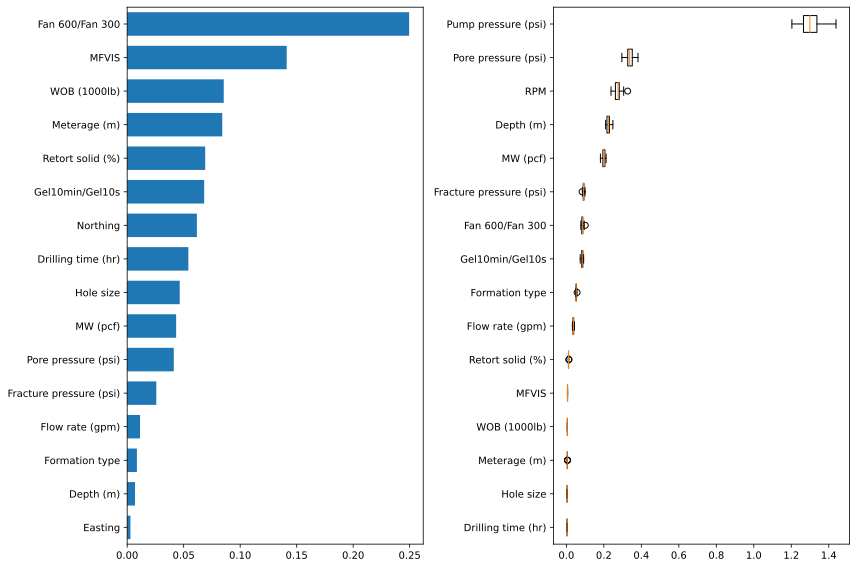

In [121]:
result = permutation_importance(xgb, X_train, y_train, n_repeats=50,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(xgb.feature_importances_)
tree_indices = np.arange(0, len(xgb.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices,
         xgb.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(df_train.columns[tree_importance_sorted_idx])
ax1.set_ylim((0, len(xgb.feature_importances_)))
ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X_train.columns[perm_sorted_idx])
fig.tight_layout()
plt.show()

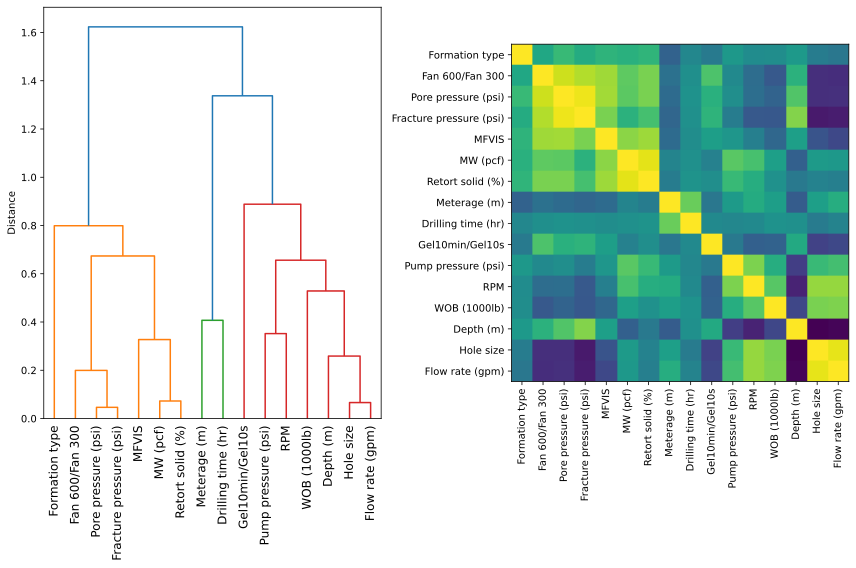

In [122]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(X_train).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T)/2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(dist_linkage, labels=X_train.columns.tolist(), ax=ax1, leaf_rotation=90)
dendro_idx = np.arange(0, len(dendro['ivl']))

ax1.set_ylabel('Distance')
ax2.imshow(corr[dendro['leaves'], :][:, dendro['leaves']])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro['ivl'], rotation='vertical')
ax2.set_yticklabels(dendro['ivl'])
fig.tight_layout()
plt.show()

In [152]:
X_train.head()

Depth (m)  Meterage (m)  Drilling time (hr)  Formation type  Hole size  \
0     3957.0          17.0                24.0              15     12.250   
1     2881.0          14.0                13.0               9     12.250   
2     3494.0          90.0                24.0               2      4.125   
3     3740.0          55.0                16.0               2      5.875   
4     2837.5           6.5                 3.0              10     17.500   

   WOB (1000lb)  Flow rate (gpm)  MW (pcf)  MFVIS  Retort solid (%)  \
0          27.5              430      80.0     44              20.0   
1          22.5              550     140.0     51              44.0   
2           6.5              190      57.5     36              13.0   
3          22.0              250      55.5     34               3.0   
4          22.5              800     100.0     46              26.0   

   Pore pressure (psi)  Fracture pressure (psi)  Fan 600/Fan 300  \
0          6896.406814              9450.631560         1.602919   
1          7713.479368              9516.431614         1.802491   
2          4268.104581              8653.143534         1.696500   
3          4615.819356              9358.099516         1.640843   
4          4015.829623              6873.814424         1.645142   

   Gel10min/Gel10s  Pump pressure (psi)         RPM  
0         1.242697          1418.333828  138.555836  
1         1.569439          2480.546481  145.590288  
2         1.641224          2066.162756   71.098159  
3         1.684190          1111.250371  117.779180  
4         1.599919          2762.944758  168.918919

In [153]:
X_test.head()

Depth (m)  Meterage (m)  Drilling time (hr)  Formation type  Hole size  \
0     2016.0          45.0                24.0               8     17.500   
1     3715.0          61.0                24.0               2      4.125   
2     1296.0          74.0                17.0               1     17.500   
3     2671.0          86.0                22.0               7     12.250   
4     1494.0         102.0                22.0               1     17.500   

   WOB (1000lb)  Flow rate (gpm)  MW (pcf)  MFVIS  Retort solid (%)  \
0          22.5              800     115.0     41              30.0   
1           7.5              145      62.5     44              14.0   
2          45.0              900      66.0     33               4.0   
3          15.0              600     151.0     59              49.0   
4          37.5              900      68.5     30               8.0   

   Pore pressure (psi)  Fracture pressure (psi)  Fan 600/Fan 300  \
0          8125.593487              9931.280929         1.734426   
1          4307.665339              8733.348905         1.684718   
2          2231.900200              3505.062670         1.347572   
3          8022.486536              9805.261322         1.737184   
4          2868.376939              4504.610435         1.254598   

   Gel10min/Gel10s  Pump pressure (psi)         RPM  
0         1.446490          2654.633205  181.615682  
1         1.451539          2274.509950   80.891743  
2         1.358334          1870.231660  162.866053  
3         1.444812          2669.414909  177.435402  
4         1.269205          2641.519157  157.580933

In [154]:
from sklearn.ensemble import RandomForestRegressor

# Fit the regressor
rf_reg = RandomForestRegressor().fit(X_train, y_train)

# Print the mean accuracy achieved by the regressor on the test set
rf_reg.score(X_test, y_test)

0.9220816851751508

In [155]:
from sklearn.inspection import permutation_importance

def feature_importance(reg, X, y, top_limit=None):

  # Retrieve the Bunch object after 50 repeats
  # n_repeats is the number of times that each feature was permuted to compute the final score
  bunch = permutation_importance(reg, X, y,
                                 n_repeats=50, random_state=42)

  # Average feature importance
  imp_means = bunch.importances_mean

  # List that contains the index of each feature in descending order of importance
  ordered_imp_means_args = np.argsort(imp_means)[::-1]

  # If no limit print all features
  if top_limit is None:
    top_limit = len(ordered_imp_means_args)

  # Print relevant information
  for i, _ in zip(ordered_imp_means_args, range(top_limit)):
    name = df_train.columns[i]
    imp_score = imp_means[i]
    imp_std = bunch.importances_std[i]
    print(f"Feature {name} with index {i} has an average importance score of {imp_score:.3f} +/- {imp_std:.3f}\n")

In [156]:
feature_importance(rf_reg, X_train, y_train)

Feature Pump pressure (psi) with index 14 has an average importance score of 1.534 +/- 0.060

Feature RPM with index 15 has an average importance score of 0.222 +/- 0.012

Feature Depth (m) with index 0 has an average importance score of 0.203 +/- 0.010

Feature Pore pressure (psi) with index 10 has an average importance score of 0.182 +/- 0.009

Feature Fan 600/Fan 300 with index 12 has an average importance score of 0.180 +/- 0.014

Feature Fracture pressure (psi) with index 11 has an average importance score of 0.117 +/- 0.006

Feature MW (pcf) with index 7 has an average importance score of 0.083 +/- 0.003

Feature Gel10min/Gel10s with index 13 has an average importance score of 0.070 +/- 0.003

Feature Formation type with index 3 has an average importance score of 0.052 +/- 0.002

Feature Flow rate (gpm) with index 6 has an average importance score of 0.023 +/- 0.001

Feature Retort solid (%) with index 9 has an average importance score of 0.016 +/- 0.001

Feature MFVIS with index

In [157]:
feature_importance(rf_reg, X_test, y_test)

Feature Pump pressure (psi) with index 14 has an average importance score of 1.543 +/- 0.146

Feature RPM with index 15 has an average importance score of 0.177 +/- 0.025

Feature Pore pressure (psi) with index 10 has an average importance score of 0.146 +/- 0.028

Feature Fan 600/Fan 300 with index 12 has an average importance score of 0.128 +/- 0.016

Feature Fracture pressure (psi) with index 11 has an average importance score of 0.091 +/- 0.014

Feature Depth (m) with index 0 has an average importance score of 0.079 +/- 0.011

Feature MW (pcf) with index 7 has an average importance score of 0.060 +/- 0.008

Feature Gel10min/Gel10s with index 13 has an average importance score of 0.053 +/- 0.009

Feature Formation type with index 3 has an average importance score of 0.039 +/- 0.004

Feature Flow rate (gpm) with index 6 has an average importance score of 0.025 +/- 0.003

Feature Retort solid (%) with index 9 has an average importance score of 0.013 +/- 0.003

Feature MFVIS with index

In [129]:
print("On TRAIN split:\n")
feature_importance(rf_reg, X_train, y_train, top_limit=16)

print("\nOn TEST split:\n")
feature_importance(rf_reg, X_test, y_test, top_limit=16)

On TRAIN split:

Feature Fan 600/Fan 300 with index 14 has an average importance score of 1.454 +/- 0.052

Feature Gel10min/Gel10s with index 15 has an average importance score of 0.203 +/- 0.011

Feature Northing with index 0 has an average importance score of 0.203 +/- 0.009

Feature Pore pressure (psi) with index 12 has an average importance score of 0.172 +/- 0.014

Feature MFVIS with index 10 has an average importance score of 0.153 +/- 0.008

Feature WOB (1000lb) with index 7 has an average importance score of 0.118 +/- 0.005

Feature Retort solid (%) with index 11 has an average importance score of 0.101 +/- 0.004

Feature Fracture pressure (psi) with index 13 has an average importance score of 0.072 +/- 0.003

Feature Meterage (m) with index 3 has an average importance score of 0.047 +/- 0.002

Feature Hole size with index 6 has an average importance score of 0.022 +/- 0.001

Feature MW (pcf) with index 9 has an average importance score of 0.016 +/- 0.001

Feature Flow rate (gp

In [158]:
Final_X = pd.concat([X_train, X_test])

Final_y = pd.concat([y_train, y_test])

In [159]:
print("On Total split:\n")
feature_importance(rf_reg, Final_X, Final_y)

On Total split:

Feature Pump pressure (psi) with index 14 has an average importance score of 1.531 +/- 0.046

Feature RPM with index 15 has an average importance score of 0.213 +/- 0.011

Feature Depth (m) with index 0 has an average importance score of 0.176 +/- 0.009

Feature Pore pressure (psi) with index 10 has an average importance score of 0.175 +/- 0.013

Feature Fan 600/Fan 300 with index 12 has an average importance score of 0.172 +/- 0.010

Feature Fracture pressure (psi) with index 11 has an average importance score of 0.114 +/- 0.007

Feature MW (pcf) with index 7 has an average importance score of 0.079 +/- 0.003

Feature Gel10min/Gel10s with index 13 has an average importance score of 0.067 +/- 0.003

Feature Formation type with index 3 has an average importance score of 0.048 +/- 0.002

Feature Flow rate (gpm) with index 6 has an average importance score of 0.023 +/- 0.001

Feature Retort solid (%) with index 9 has an average importance score of 0.016 +/- 0.001

Feature

In [161]:
# Preserve only the top 15 features
X_train_top_features = X_train.drop(['Drilling time (hr)'], 1)
X_test_top_features = X_test.drop(['Drilling time (hr)'], 1)

# Re-train with only these features
rf_reg_top = RandomForestRegressor().fit(X_train_top_features, y_train)

# Compute mean accuracy achieved
rf_reg_top.score(X_test_top_features, y_test)

0.9238125385168824

In [162]:
# Preserve only the top 14 features
X_train_top_features = X_train.drop(['Drilling time (hr)', 'Hole size'], 1)
X_test_top_features = X_test.drop(['Drilling time (hr)', 'Hole size'], 1)

# Re-train with only these features
rf_reg_top = RandomForestRegressor().fit(X_train_top_features, y_train)

# Compute mean accuracy achieved
rf_reg_top.score(X_test_top_features, y_test)

0.9225626118419012

In [163]:
# Preserve only the top 13 features
X_train_top_features = X_train.drop(['Drilling time (hr)', 'Hole size', 'Meterage (m)'], 1)
X_test_top_features = X_test.drop(['Drilling time (hr)', 'Hole size', 'Meterage (m)'], 1)

# Re-train with only these features
rf_reg_top = RandomForestRegressor().fit(X_train_top_features, y_train)

# Compute mean accuracy achieved
rf_reg_top.score(X_test_top_features, y_test)

0.9348248651353951

In [164]:
# Preserve only the top 12 features
X_train_top_features = X_train.drop(['Drilling time (hr)', 'Hole size', 'Meterage (m)', 'WOB (1000lb)'], 1)
X_test_top_features = X_test.drop(['Drilling time (hr)', 'Hole size', 'Meterage (m)', 'WOB (1000lb)'], 1)

# Re-train with only these features
rf_reg_top = RandomForestRegressor().fit(X_train_top_features, y_train)

# Compute mean accuracy achieved
rf_reg_top.score(X_test_top_features, y_test)

0.9325078759368725

In [165]:
# Preserve only the top 11 features
X_train_top_features = X_train.drop(['Drilling time (hr)', 'Hole size', 'Meterage (m)', 'WOB (1000lb)', 'MFVIS'], 1)
X_test_top_features = X_test.drop(['Drilling time (hr)', 'Hole size', 'Meterage (m)', 'WOB (1000lb)', 'MFVIS'], 1)

# Re-train with only these features
rf_reg_top = RandomForestRegressor().fit(X_train_top_features, y_train)

# Compute mean accuracy achieved
rf_reg_top.score(X_test_top_features, y_test)

0.9304077799044184

In [166]:
# Preserve only the top 10 features
X_train_top_features = X_train.drop(['Drilling time (hr)', 'Hole size', 'Meterage (m)', 'WOB (1000lb)', 'MFVIS', 'Retort solid (%)'], 1)
X_test_top_features = X_test.drop(['Drilling time (hr)', 'Hole size', 'Meterage (m)', 'WOB (1000lb)', 'MFVIS', 'Retort solid (%)'], 1)

# Re-train with only these features
rf_reg_top = RandomForestRegressor().fit(X_train_top_features, y_train)

# Compute mean accuracy achieved
rf_reg_top.score(X_test_top_features, y_test)

0.9338893509251559

## Evaluate the importance of the new top features

In [167]:
# create the train input and output
X_train = X_train.drop(['Drilling time (hr)', 'Hole size', 'Meterage (m)'], 1) #Feature Matrix

In [168]:
# create the test input and output
X_test = X_test.drop(['Drilling time (hr)', 'Hole size', 'Meterage (m)'], 1) #Feature Matrix

In [ ]:
X_test.head()

In [170]:
# Select 5 top regressors
regs = {"GradientBoost": GradientBoostingRegressor(), 
        "Decision Tree": DecisionTreeRegressor(), 
        "RandomForest": RandomForestRegressor(),
        "ExtraTree": ExtraTreesRegressor(), 
        "XGBoost": XGBRegressor()}


# Compute feature importance on the test set given a Regressor
def fit_compute_importance(reg):
  reg.fit(X_train, y_train)
  print(f"📏 Mean accuracy score on the test set: {reg.score(X_test, y_test)*100:.2f}%\n")
  print("🔝 Top features when using the test set:\n")
  feature_importance(reg, X_test, y_test, top_limit=14)


# Print results
for name, reg in regs.items():
  print("====="*20)
  print(f"➡️ {name} regressor\n")
  fit_compute_importance(reg)

➡️ GradientBoost regressor

📏 Mean accuracy score on the test set: 80.73%

🔝 Top features when using the test set:

Feature Fracture pressure (psi) with index 11 has an average importance score of 1.420 +/- 0.131

Feature Fan 600/Fan 300 with index 12 has an average importance score of 0.107 +/- 0.016

Feature MFVIS with index 8 has an average importance score of 0.095 +/- 0.016

Feature Depth (m) with index 0 has an average importance score of 0.061 +/- 0.015

Feature Pore pressure (psi) with index 10 has an average importance score of 0.048 +/- 0.009

Feature Retort solid (%) with index 9 has an average importance score of 0.043 +/- 0.008

Feature MW (pcf) with index 7 has an average importance score of 0.040 +/- 0.010

Feature Hole size with index 4 has an average importance score of 0.028 +/- 0.008

Feature Meterage (m) with index 1 has an average importance score of 0.022 +/- 0.004

Feature Formation type with index 3 has an average importance score of 0.015 +/- 0.003

Feature Flo

## Shapley

In [171]:
import shap

In [172]:
# Need to load JS vis in the notebook
shap.initjs()

In [173]:
# Define input and output for train data
X_train = df_train.drop(['Mud loss (bbl/hr)'], 1)
y_train = df_train[['Mud loss (bbl/hr)']]

In [174]:
# Define input and output for test data
X_test = df_test.drop(['Mud loss (bbl/hr)'], 1)
y_test = df_test[['Mud loss (bbl/hr)']]

In [175]:
# Extra Tree Regression
extra = ExtraTreesRegressor()
extra.fit(X_train, y_train)

# evaluate the model
yextra = extra.predict(X_test)

In [176]:
# compute SHAP values
explainer = shap.Explainer(extra, X_train)
shap_values = explainer(X_train)

 99%|===================| 2342/2365 [01:35<00:00]        

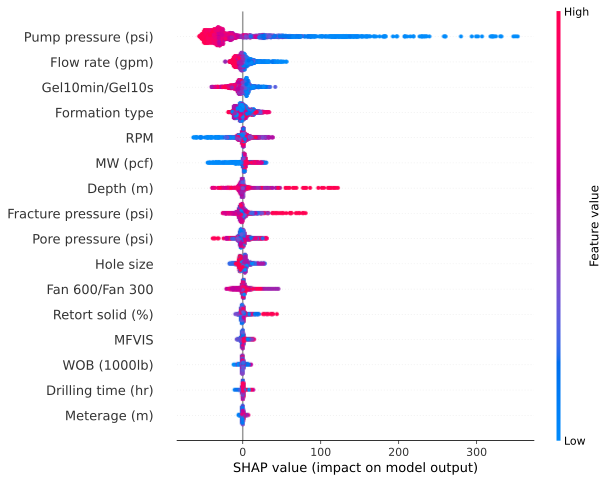

In [177]:
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

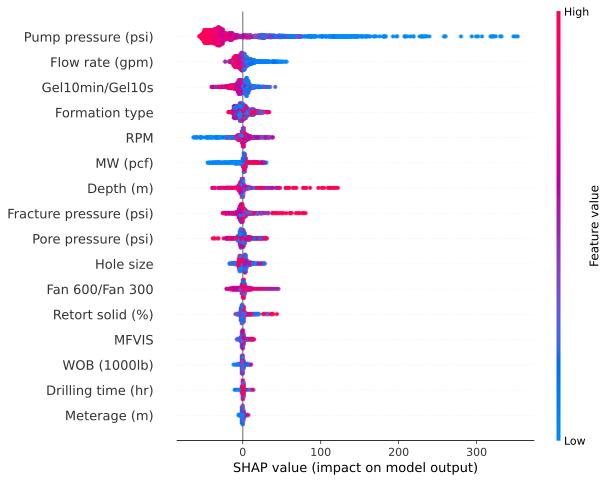

In [178]:
shap.plots.beeswarm(shap_values, max_display=20)

In [180]:
# compute SHAP values
explainer = shap.Explainer(extra, X_test)
shap_values = explainer(X_test)

 98%|===================| 410/418 [00:17<00:00]        

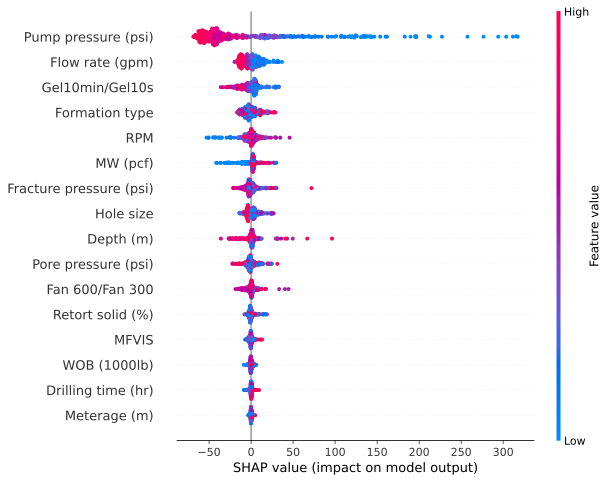

In [181]:
shap.plots.beeswarm(shap_values, max_display=20)

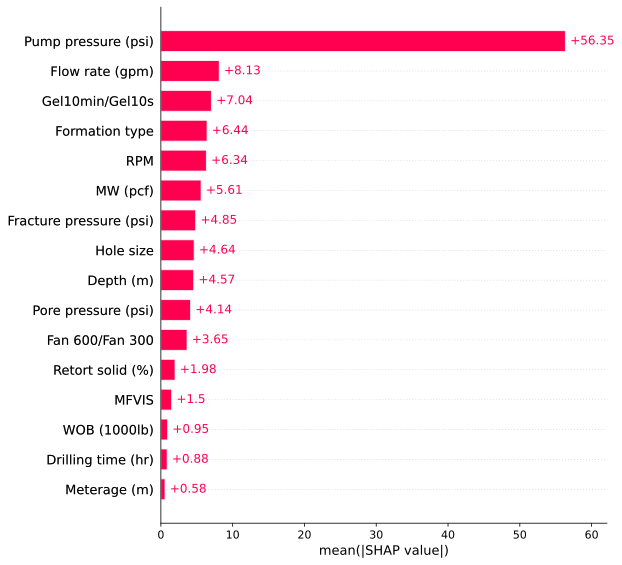

In [182]:
shap.plots.bar(shap_values.abs.mean(0), max_display=20)

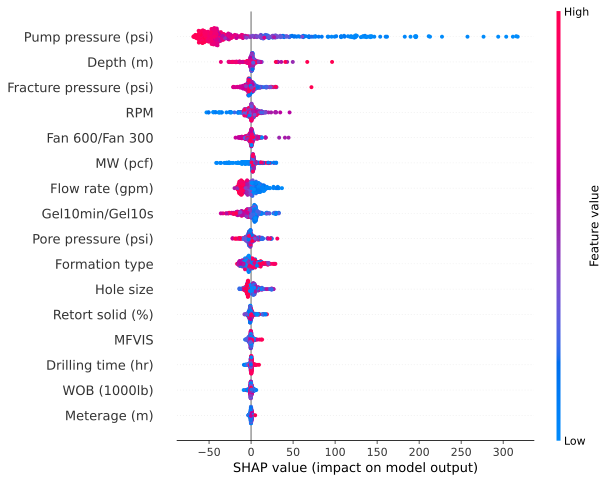

In [183]:
shap.plots.beeswarm(shap_values, order=shap_values.abs.max(0), max_display=20)

In [187]:
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

### Mud loss prediction with relevant features

In [197]:
# Define input and output for train data
X_train = df_train.drop(['Drilling time (hr)', 'WOB (1000lb)', 'Meterage (m)'], 1)
y_train = df_train[['Mud loss (bbl/hr)']]

In [198]:
# Define input and output for train data
X_test = df_test.drop(['Drilling time (hr)', 'WOB (1000lb)', 'Meterage (m)'], 1)
y_test = df_test[['Mud loss (bbl/hr)']]

In [193]:
# Select 5 top regressors
regs = {"GradientBoost": GradientBoostingRegressor(), 
        "Decision Tree": DecisionTreeRegressor(), 
        "RandomForest": RandomForestRegressor(),
        "ExtraTree": ExtraTreesRegressor(), 
        "XGBoost": XGBRegressor()}


# Compute feature importance on the test set given a Regressor
def fit_compute_importance(reg):
  reg.fit(X_train, y_train)
  print(f"📏 Mean accuracy score on the test set: {reg.score(X_test, y_test)*100:.2f}%\n")
  print("🔝 Top features when using the test set:\n")
  feature_importance(reg, X_test, y_test, top_limit=14)


# Print results
for name, reg in regs.items():
  print("====="*20)
  print(f"➡️ {name} regressor\n")
  fit_compute_importance(reg)

➡️ GradientBoost regressor

📏 Mean accuracy score on the test set: 99.99%

🔝 Top features when using the test set:

Feature Gel10min/Gel10s with index 13 has an average importance score of 2.027 +/- 0.104

Feature Fan 600/Fan 300 with index 12 has an average importance score of 0.000 +/- 0.000

Feature Fracture pressure (psi) with index 11 has an average importance score of 0.000 +/- 0.000

Feature MFVIS with index 8 has an average importance score of 0.000 +/- 0.000

Feature MW (pcf) with index 7 has an average importance score of 0.000 +/- 0.000

Feature Hole size with index 4 has an average importance score of 0.000 +/- 0.000

Feature Pore pressure (psi) with index 10 has an average importance score of 0.000 +/- 0.000

Feature Retort solid (%) with index 9 has an average importance score of 0.000 +/- 0.000

Feature Flow rate (gpm) with index 6 has an average importance score of 0.000 +/- 0.000

Feature Meterage (m) with index 1 has an average importance score of 0.000 +/- 0.000

Fea

In [194]:
# Extra Tree Regression
extra = ExtraTreesRegressor()
extra.fit(X_train, y_train)

# evaluate the model
yextra = extra.predict(X_test)

In [195]:
# Evaluate model predictions

extra_score_train = extra.score(X_train, y_train)
extra_score_test = extra.score(X_test, y_test)
extra_mae = metrics.mean_absolute_error(y_test, yextra)
extra_mse = metrics.mean_squared_error(y_test, yextra)
extra_rmse = np.sqrt(metrics.mean_squared_error(y_test, yextra))
print('Accuracy of train data:',extra_score_train)
print('Accuracy of test data:' ,extra_score_test)
print('Mean Absolute Error:', extra_mae)  
print('Mean Squared Error:', extra_mse)  
print('Root Mean Squared Error:', extra_rmse)

Accuracy of train data: 1.0
Accuracy of test data: 0.999868763123292
Mean Absolute Error: 0.2809884575496005
Mean Squared Error: 1.8842966332104518
Root Mean Squared Error: 1.3726968467984662


In [196]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

extrar = OLS(y_test, add_constant(yextra)).fit()
print('AIC:', extrar.aic)

AIC: 1445.4686947872065


In [199]:
#!pip install scikit-optimize
from skopt import gp_minimize
from skopt import BayesSearchCV
from skopt.space import Integer, Real

In [201]:
search_space = {'n_estimators': Integer(1, 2000),
               'max_depth': Integer(1, 2000),
              'n_jobs': Integer(1, 2000)}

bayes_search = BayesSearchCV(extra, search_space, cv=3, n_jobs=-1, verbose=1, n_iter=30, random_state=0)

In [202]:
bayes_search.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

BayesSearchCV(cv=3, estimator=ExtraTreesRegressor(), n_iter=30, n_jobs=-1,
              random_state=0,
              search_spaces={'max_depth': Integer(low=1, high=2000, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=1, high=2000, prior='uniform', transform='normalize'),
                             'n_jobs': Integer(low=1, high=2000, prior='uniform', transform='normalize')},
              verbose=1)

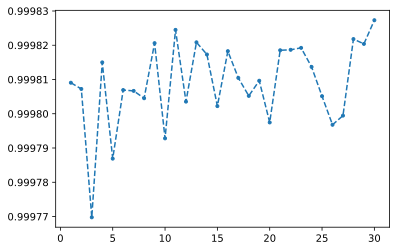

In [203]:
plt.plot(range(1,31), bayes_search.cv_results_['mean_test_score'], '.--')
plt.show()

In [204]:
bayes_search.best_score_

0.9998273029543148

In [205]:
bayes_search.best_params_

OrderedDict([('max_depth', 216), ('n_estimators', 530), ('n_jobs', 1901)])

In [206]:
# Bayes

model = bayes_search.best_estimator_

model.fit(X_train, y_train)

# evaluate the model
pred = model.predict(X_test)

# Print the name and gini importance of each feature
for feature in zip(X_train.columns, model.feature_importances_):
    print(feature)

('Depth (m)', 0.0029565686523605247)
('Formation type', 0.003076460646200506)
('Hole size', 0.0006714891550366419)
('Flow rate (gpm)', 0.0009045456785557345)
('MW (pcf)', 0.00036156177096564)
('MFVIS', 0.000278136738769705)
('Retort solid (%)', 0.00016464255208869513)
('Pore pressure (psi)', 0.0011768014584952705)
('Fracture pressure (psi)', 0.00216410767823654)
('Fan 600/Fan 300', 0.00023415942388017158)
('Gel10min/Gel10s', 0.00024130981502928833)
('Pump pressure (psi)', 0.0266033531078386)
('RPM', 0.0008658220814074863)
('Mud loss (bbl/hr)', 0.9603010412411352)


In [207]:
# Evaluate model predictions

model_score_train = model.score(X_train, y_train)
model_score_test = model.score(X_test, y_test)
model_mae = metrics.mean_absolute_error(y_test, pred)
model_mse = metrics.mean_squared_error(y_test, pred)
model_rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
print('Accuracy of train data:',model_score_train)
print('Accuracy of test data:',model_score_test)
print('Mean Absolute Error:',model_mae)  
print('Mean Squared Error:',model_mse)  
print('Root Mean Squared Error:',model_rmse)

Accuracy of train data: 1.0
Accuracy of test data: 0.9998957342376372
Mean Absolute Error: 0.24035867495732438
Mean Squared Error: 1.4970458754238507
Root Mean Squared Error: 1.223538260711062


In [208]:
BOextra = OLS(y_test, add_constant(pred)).fit()
print('AIC:', BOextra.aic)

AIC: 1358.6893588409282


In [210]:
model.index = y_test.index # its important for comparison
ET_SV = pd.DataFrame(pred, columns=['predictions']).to_csv("prediction_ET_SV.csv")

In [17]:
df_pred = pd.read_csv(r"C:\Users\User\Desktop\ML Projects\Drilling fluid loss\Predictions_Analysis.csv")
df_pred.head()

Data  Formation type  Pump pressure (psi)      Actual  SVM_predictions  \
0     1               8          2654.633205    0.000000        53.404458   
1     2               2          2274.509950  158.537868        53.404458   
2     3               1          1870.231660    0.000000        53.404458   
3     4               7          2669.414909   24.676270        53.404458   
4     5               1          2641.519157    7.394713        53.404458   

   Ridge_predictions  Lasso_predictions  DT_predictions  RF_predictions  \
0          24.492163          19.557516        0.000000        0.166513   
1          46.592109          37.590469       72.376299      101.430074   
2          18.030346          18.614106        0.000000        4.818173   
3          38.940998          35.541945       20.170478       25.067636   
4         -12.223752         -14.743869        0.000000        4.940238   

   GBR_predictions  ET_predictions  XGB_predictions       BO_ET  
0         6.874845        1.454110        -0.441503    0.000000  
1        56.989495      129.933790       129.722900  158.086658  
2        14.506276        3.485744        -4.032167    0.000000  
3        33.551047       25.247226        23.761444   24.681318  
4         6.518910        9.796219         0.248892    7.399433

<AxesSubplot:xlabel='BO_ET', ylabel='Density'>

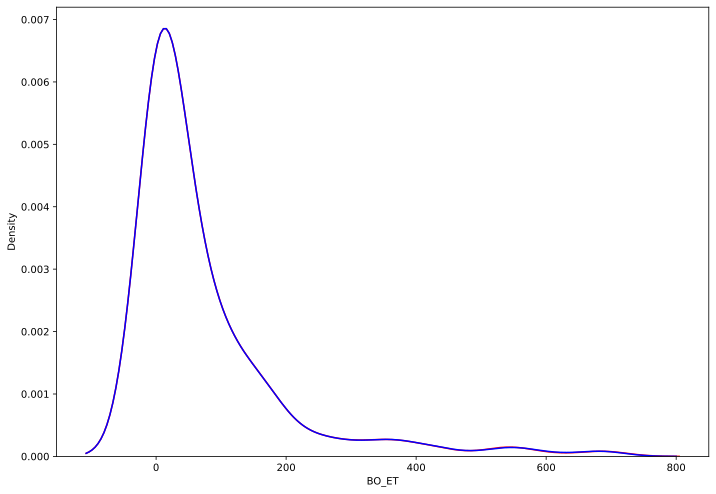

In [13]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

ax1 = sns.distplot(df_pred['Actual'], hist=False, color="r", label="Actual")

sns.distplot(df_pred['BO_ET'], hist=False, color="b", label="Predicted Values", ax=ax1)

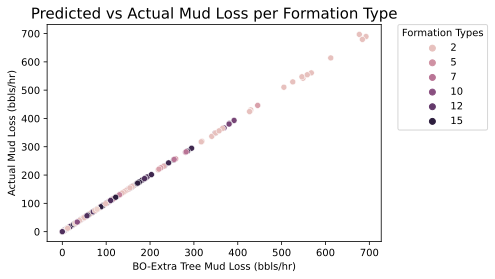

In [5]:
sns.scatterplot(data=df_pred, x='BO_ET', y='Actual', hue='Formation type')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Formation Types')
plt.xlabel('BO-Extra Tree Mud Loss (bbls/hr)')
plt.ylabel('Actual Mud Loss (bbls/hr)')
plt.title('Predicted vs Actual Mud Loss per Formation Type', size=15)
plt.show()

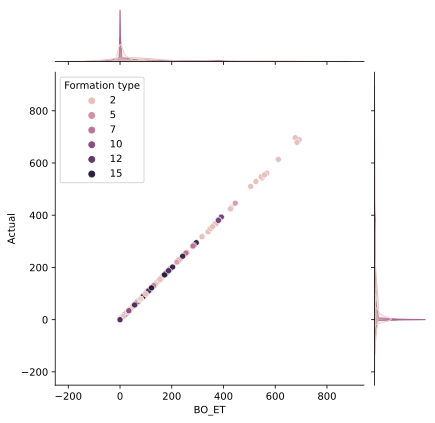

In [29]:
g = sns.jointplot(data=df_pred, x="BO_ET", y="Actual", hue='Formation type')

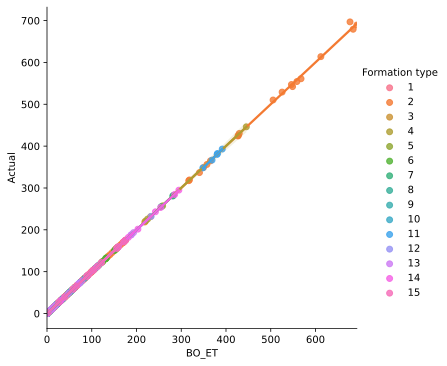

In [15]:
sns.lmplot(x="BO_ET", y="Actual", hue="Formation type", data=df_pred)

## Due to the stochastic nature of the models some gave out varying results when run multiple times. As such, the mean of 10 prediction runs were used in the publication